#  <span style="color: #1f77b4;">Loan Prediction Model</span>

**Objective**: This model is designed to make classification modeling for a specific type of problem where we categorize data into different groups. Here's a step-by-step guide to understand and build this model:

### <span style="color: #1f77b4;">Table of Contents</span>

[1. Problem Statement](#section1)

[2. Hypothesis Generation](#section2)

[3. System Setup and Data Loading](#section3)

[4. Understanding the Data](#section4)

[5. Exploratory Data Analysis (EDA)](#section5)

&emsp;[5.1 Univariate Analysis](#section5.1)

&emsp;[5.2 Bivariate Analysis](#section5.2)

[6. Data Cleaning: Missing Value and Outlier Treatment](#section6)

[7. Model Building: Part I](#section7)

&emsp;[7.1 Logistic Regression using Stratified k-folds Cross Validation](#section7.1)

[8. Feature Engineering](#section8)

[9. Model Building: Part II](#section9)

&emsp;[9.1 Decision Tree](#section9.1)

&emsp;[9.2 Random Forest](#section9.2)

&emsp;[9.3 XGBoost](#section9.3)

[10. Conclusion](#section10)

---
<a id='section1'></a>

## <span style="color: #1f77b4;">Problem Statement</span>

Understanding the problem statement is the first and foremost step. This would help you give an intuition of what you will face ahead of time. Let us see the problem statement.

<span style="color: #1f77b4; font-weight: bold;">Nairobi Housing Finance Company</span> offers all types of housing loans. They are present in all urban, semi-urban, and rural locations. Customers apply for a house loan once the company verifies their loan eligibility. The organization wants to <span style="font-style: italic;">automate the loan eligibility process (in real time)</span> based on the information provided by the consumer when filling out the online application form. These characteristics include <span style="font-weight: bold;">Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History</span>, and others. To automate this process, they created a problem to identify <span style="font-style: italic; color: #1f77b4;">client segments that are eligible for loan amounts</span> so that they may directly target these customers.


It is a <span style="color: #2ca02c; font-weight: bold;">classification problem</span> where we have to predict whether a loan would be approved or not. In these kinds of problems, we have to predict <span style="font-style: italic;">discrete values</span> based on a given set of independent variables (s).

- <span style="font-weight: bold;">Binary Classification</span>: In this context, binary classification refers to predicting either of the two given classes. For example, classifying loan applications as either <span style="font-style: italic;">approved</span> or <span style="font-style: italic;">rejected</span> based on customer data.

- <span style="font-weight: bold;">MultiClass Classification</span>: Here, multiclass classification involves categorizing loan applications into multiple classes. For instance, you might classify loan applications into categories like <span style="font-style: italic;">approved</span>, <span style="font-style: italic;">rejected</span>, and <span style="font-style: italic;">under review</span> based on customer attributes.

<span style="font-style: italic;">Loan prediction</span> is a very common real-life problem that each retail bank faces at least once in its lifetime. If done correctly, it can save a lot of man-hours at the end of a retail bank.

![Loan prediction](images/image_1.png)

---
<a id='section2'></a>
## <span style="color: #1f77b4;">Hypothesis Generation</span>

After looking at the problem statement, we will now move into hypothesis generation. It is the process of listing out all the possible factors that can affect the outcome.

Below are some of the factors which I think can affect the Loan Approval (dependent variable for this loan prediction problem):

- <span style="font-weight: bold;">Salary</span>: Applicants with high income should have more chances of getting approval.
- <span style="font-weight: bold;">Previous History</span>: Applicants who have paid their historical debts have more chances of getting approval.
- <span style="font-weight: bold;">Loan Amount</span>: Less the amount higher the chances of getting approval.
- <span style="font-weight: bold;">Loan Term</span>: Less the time period has higher chances of approval.
- <span style="font-weight: bold;">EMI</span>: Lesser the amount to be paid monthly, the higher the chances of getting approval.

---
<a id='section3'></a>
## <span style="color: #1f77b4;">System Setup and Data Loading</span>

We will be using Python for this problem along with the below-listed libraries. 

#### <span style="font-weight: bold;">Loading Packages</span>

In [1]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")



#### <span style="font-weight: bold;">Data</span>

For this problem, we have been given two CSV files: train, and test.

- <span style="font-weight: bold;">Train file</span> will be used for training the model, i.e. our model will learn from this file. It contains all the independent variables and the target variable.
- <span style="font-weight: bold;">The test file</span> contains all the independent variables, but not the target variable. We will apply the model to predict the target variable for the test data.

#### <span style="font-weight: bold;">Reading Data</span>

In [2]:
train=pd.read_csv("data/train.csv") 
test=pd.read_csv("data/test.csv")

Let’s make a copy of the train and test data so that even if we change anything in these datasets we would not lose the original datasets.

In [3]:
train_original=train.copy() 
test_original=test.copy()

<a id='section4'></a>
## <span style="color: #1f77b4;">Understanding the Data</span>
In this section, we will look at the train and test datasets. Firstly, we will check the features present in our data, and then we will look at their data types.

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

We have 12 independent variables and 1 target variable, i.e. Loan_Status in the training dataset. Let’s look at the columns of the test dataset.

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

We have similar features in the test dataset as the training dataset except for the Loan_Status. We will predict the Loan_Status using the model built using the train data. Given below is the description for each variable.

![description for each variable](images/image_2.png)

In [6]:
# Print data types for each variable

train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We can see there are three formats of data types:

- <b><i>object:</i></b> Object format means variables are categorical. Categorical variables in our dataset are: <b><i>Loan_ID</i></b>, <b><i>Gender</i></b>, <b><i>Married</i></b>, <b><i>Dependents</i></b>, <b><i>Education</i></b>, <b><i>Self_Employed</i></b>, <b><i>Property_Area</i></b>, <b><i>Loan_Status</i></b>.

- <b><i>int64:</i></b> It represents the integer variables. <b><i>ApplicantIncome</i></b> is of this format.

- <b><i>float64:</i></b> It represents the variable that has some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: <b><i>CoapplicantIncome</i></b>, <b><i>LoanAmount</i></b>, <b><i>Loan_Amount_Term</i></b>, and <b><i>Credit_History</i></b>.


In [7]:
# Let’s look at the shape of the dataset.

train.shape, test.shape

((614, 13), (367, 12))

We have 614 rows and 13 columns in the training dataset and 367 rows and 12 columns in the test dataset.

---
<a id='section5'></a>
## <span style="color: #1f77b4;">Exploratory Data Analysis (EDA)</span>

<a id='section5.1'></a>
### <span style="color: #1f77b4;">Univariate Analysis</span>

We shall conduct a univariate analysis in this section. It is the simplest method of data analysis in which we examine each variable individually. To calculate the number of each category in a given variable, we can use frequency tables or bar charts. To examine the distribution of numerical variables, Probability Density Functions (PDF) can be employed.

#### <span style="font-weight: bold;">Target Variable</span>
We will first look at the target variable, i.e., <b><i>Loan_Status</i></b>. As it is a categorical variable, let us look at its frequency table, percentage distribution, and bar plot.

The frequency table of a variable will give us the count of each category in that variable.

In [8]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
# Normalize can be set to True to print proportions instead of number
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

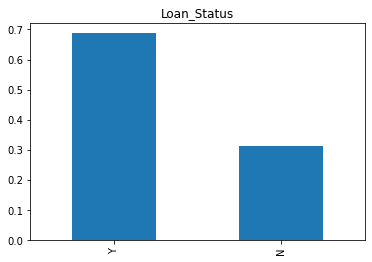

In [10]:
# Create a bar plot to visualize the distribution
train['Loan_Status'].value_counts(normalize=True).plot.bar(title='Loan_Status') 
plt.show()

422(around 69%) people out of 614 got the approval.

Now, let’s visualize each variable separately. Different types of variables are Categorical, ordinal, and numerical.

#### Categorical Features

- **Categorical features:** These features have categories.
    - <b>Gender</b>
    - <b>Married</b>
    - <b>Self_Employed</b>
    - <b>Credit_History</b>
    - <b>Loan_Status</b>

#### Ordinal Features

- **Ordinal features:** Variables in categorical features having some order involved.
    - <b>Dependents</b>
    - <b>Education</b>
    - <b>Property_Area</b>

#### Numerical Features

- **Numerical features:** These features have numerical values.
    - <b>ApplicantIncome</b>
    - <b>CoapplicantIncome</b>
    - <b>LoanAmount</b>
    - <b>Loan_Amount_Term</b>

Let's start by visualizing the categorical and ordinal features.


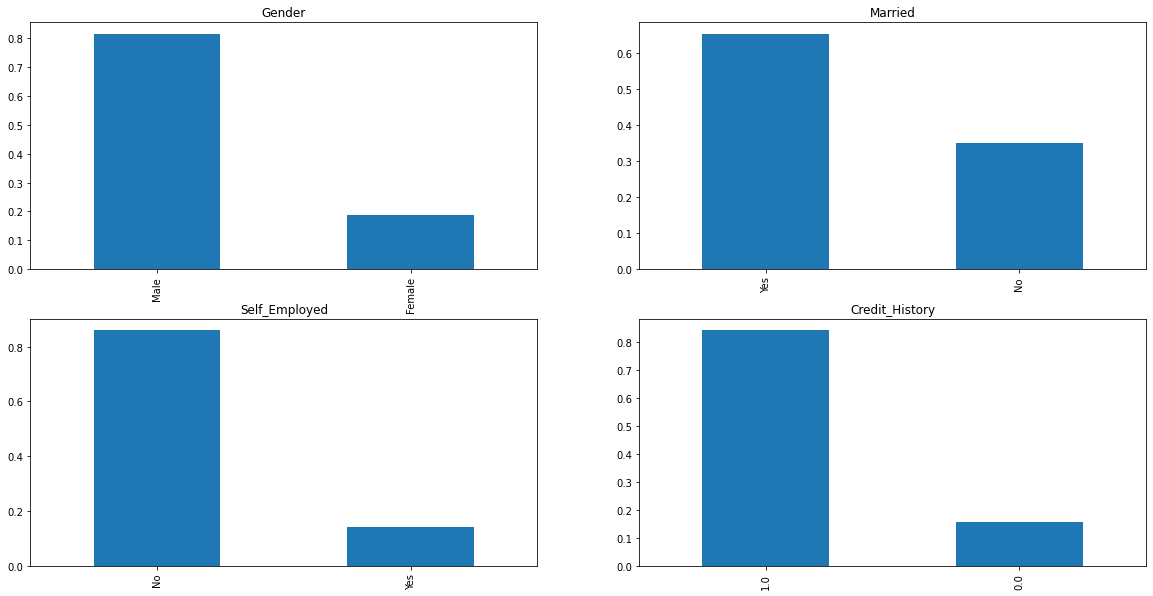

In [11]:
# Independent Variable (Categorical)

plt.figure(1)
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20, 10), title='Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title='Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History') 
plt.show()

From the bar plots presented above, we can make the following observations:

- **Gender:** Approximately 80% of the applicants in the dataset are male.

- **Marital Status (Married):** Around 65% of the applicants in the dataset are married.

- **Self-Employment:** About 15% of applicants in the dataset are self-employed.

- **Credit History:** Around 85% of applicants have repaid their debts.

Now let’s visualize the ordinal variables.

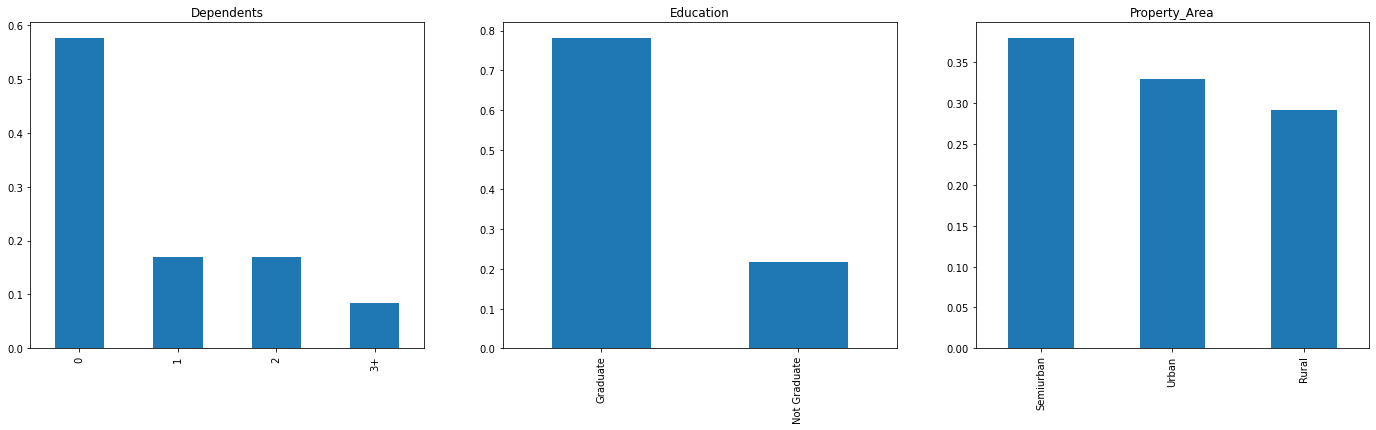

In [12]:
# Independent Variable (Ordinal)
plt.figure(1)

plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24, 6), title='Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')

plt.show()

From the bar plots displayed above, we can draw the following conclusions:

1. **Dependents:** The majority of applicants do not have any dependents.

2. **Education:** Approximately 80% of the applicants are graduates.

3. **Property Area:** Most of the applicants originate from semi-urban areas.

Till now we have seen the categorical and ordinal variables and now let’s visualize the numerical variables. 

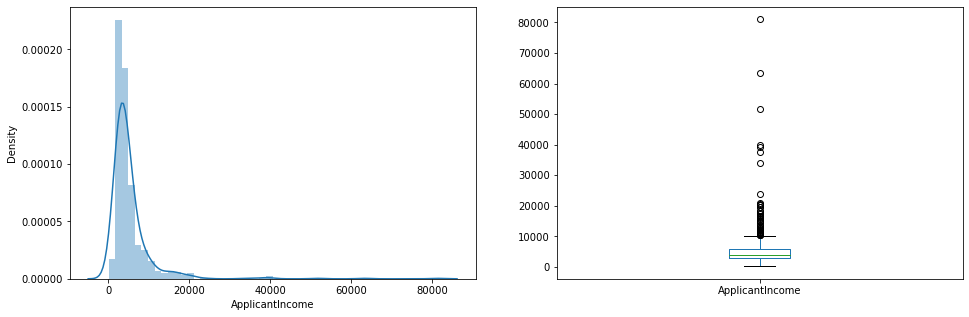

In [13]:
#Let’s look at the distribution of Applicant income first.

plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']);

plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

Most of the data in the distribution of applicant income are towards the left which means it is not normally distributed. We will try to make it normal in later sections as algorithms work better if the data is normally distributed.

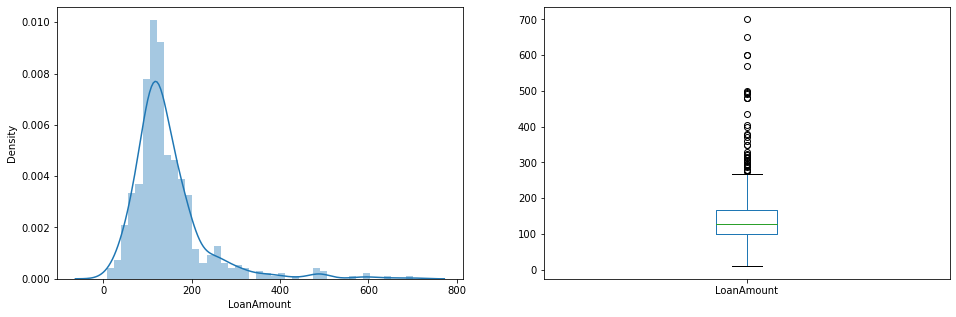

In [14]:
#Let’s look at the distribution of the LoanAmount variable.
plt.figure(1) 
plt.subplot(121)
df=train.dropna()
sns.distplot(train['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

Now we would like to know how well each feature correlates with Loan Status. So, in the next section, we will look at the bivariate analysis.

---
<a id='section5.2'></a>
### <span style="color: #1f77b4;">Bivariate Analysis</span>

In this section, we revisit previously generated hypotheses related to loan approval and conduct bivariate analysis to test these hypotheses. We aim to explore the relationship between the target variable (loan approval) and categorical independent variables. Our goal is to gain insights by analyzing the proportion of approved and unapproved loans using a stacked bar plot.

**Recall Hypotheses:**

1. Applicants with higher incomes are more likely to be approved for loans.
2. Applicants who have repaid previous debts have a higher chance of loan approval.
3. Loan approval may depend on the loan amount, with lower amounts leading to higher approval rates.
4. A lower monthly repayment amount increases the likelihood of loan approval.

We will now investigate these hypotheses through bivariate analysis.

### <span style="color: #1f77b4;">Categorical Independent Variable vs. Target Variable</span>

Our initial focus is to determine the relationship between the target variable (loan approval) and categorical independent variables. We will visualize this relationship using a stacked bar plot to illustrate the proportions of approved and unapproved loans.

<AxesSubplot:xlabel='Gender'>

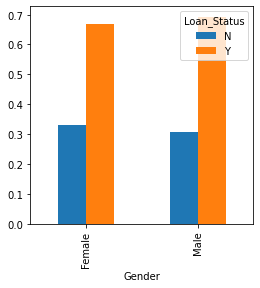

In [15]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))

The proportion of male and female applicants is more or less the same for both approved and unapproved loans.

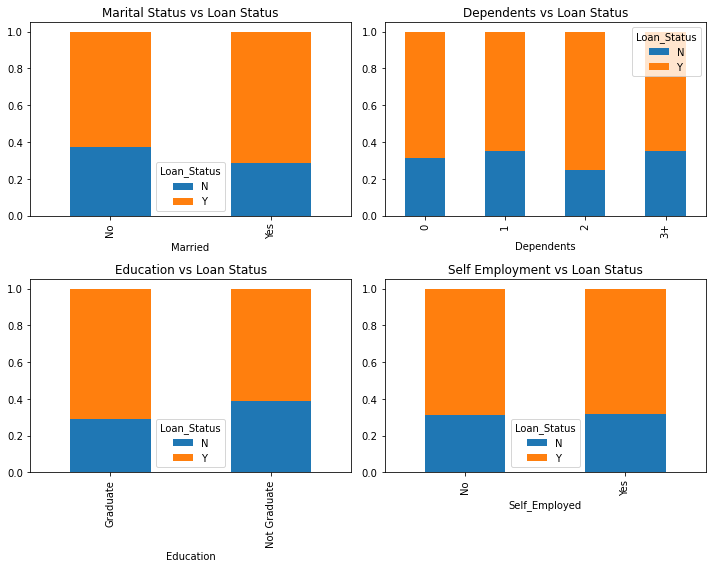

In [16]:
# Now let us visualize the remaining categorical variables vs the target variables.
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Cross-tabulate and plot 'Married' data
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axes[0, 0])
axes[0, 0].set_title('Marital Status vs Loan Status')

# Cross-tabulate and plot 'Dependents' data
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axes[0, 1])
axes[0, 1].set_title('Dependents vs Loan Status')

# Cross-tabulate and plot 'Education' data
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axes[1, 0])
axes[1, 0].set_title('Education vs Loan Status')

# Cross-tabulate and plot 'Self_Employed' data
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axes[1, 1])
axes[1, 1].set_title('Self Employment vs Loan Status')

# Show the plots
plt.tight_layout()
plt.show()

- **Proportion of Married Applicants:** The proportion of **married** applicants is **higher for the approved loans**.

- **Dependents Distribution:** The **distribution of applicants with 1 or 3+ dependents** is **similar across both categories of Loan_Status**.

- **Self_Employed vs. Loan_Status:** There is nothing significant we can infer from the **Self_Employed vs. Loan_Status** plot.

**Next Steps:**
Now, we will proceed to examine the relationship between the remaining categorical independent variables and Loan_Status.

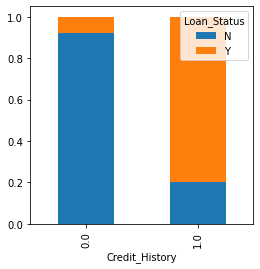

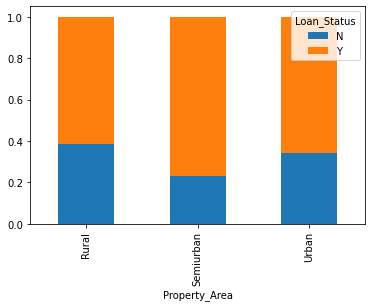

In [17]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

- It seems people with a credit history of 1 are more likely to get their loans approved.
- The proportion of loans getting approved in semi-urban areas is higher as compared to that in rural or urban areas.

Now let’s visualize numerical independent variables with respect to the target variable.

### <span style="color: #1f77b4;">Numerical Independent Variable vs Target Variable</span>

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

<AxesSubplot:xlabel='Loan_Status'>

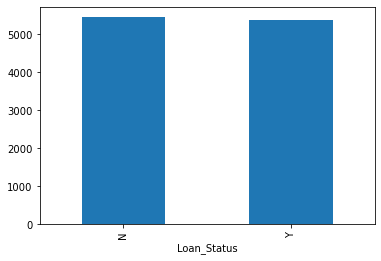

In [18]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Here the y-axis represents the mean applicant income. We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

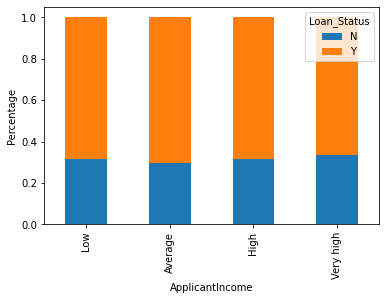

In [19]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

It can be inferred that Applicant’s income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant’s income is high the chances of loan approval will also be high.

We will analyze the applicant’s income and loan amount variable in a similar manner.

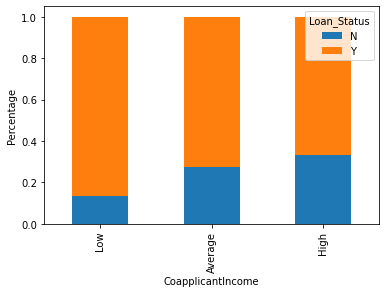

In [20]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

It shows that if co-applicants income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any co-applicant so the co-applicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and co applicants’ income to visualize the combined effect of income on loan approval.

Let us combine the Applicant Income and Co-applicant Income and see the combined effect of Total Income on the Loan_Status.

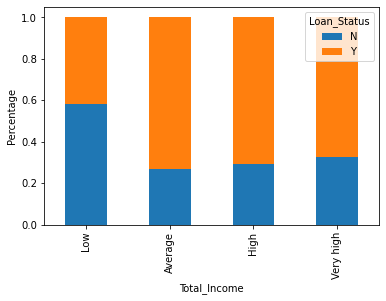

In [21]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High, and Very High Income.

Let’s visualize the Loan amount variable.

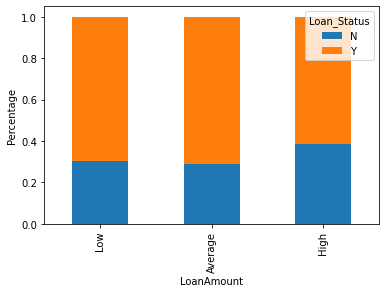

In [22]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amounts as compared to that of High Loan Amounts which supports our hypothesis which considered that the chances of loan approval will be high when the loan amount is less.

In [23]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin',
 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True) 
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

Now let’s look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker colors mean their correlation is more

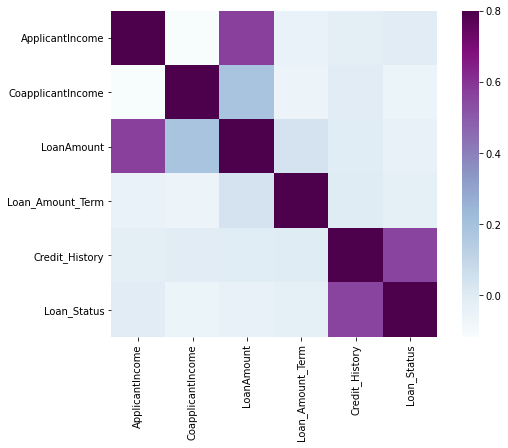

In [24]:
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

We see that the most correlated variables are (ApplicantIncome – LoanAmount) and (Credit_History – Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

---
<a id='section6'></a>
## <span style="color: #1f77b4;">Data Cleaning: Missing Value and Outlier Treatment</span>

After we have explored all of the variables in our data, we may now impute missing values and address outliers because missing data and outliers can have a negative impact on model performance.


### <span style="color: #1f77b4;">Missing Value Imputation</span>

In [25]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History features.We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:
  - For numerical variables: imputation using mean or median
  - For categorical variables: imputation using mode

There are very less missing values in Gender, Married, Dependents, Credit_History, and Self_Employed features so we can fill them using the mode of the features.

In [26]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

Now let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable.

In [27]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in the loan amount term variable, the value of 360 is repeated the most. So we will replace the missing values in this variable using the mode of this variable.

In [28]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

The variable LoanAmount will now be visible. Since it's a numerical variable, the missing values can be imputed using the mean or median. Since the mean is greatly impacted by the presence of outliers, we will utilize the median to fill in the null values. Previously, we observed that the "loan amount" has outliers.

In [29]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

Now let’s check whether all the missing values are filled in the dataset.

In [30]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see that all the missing values have been filled in the test dataset. Let’s fill all the missing values in the test dataset too with the same approach.

In [31]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

### <span style="color: #1f77b4;">Outlier Treatment</span>

As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data.

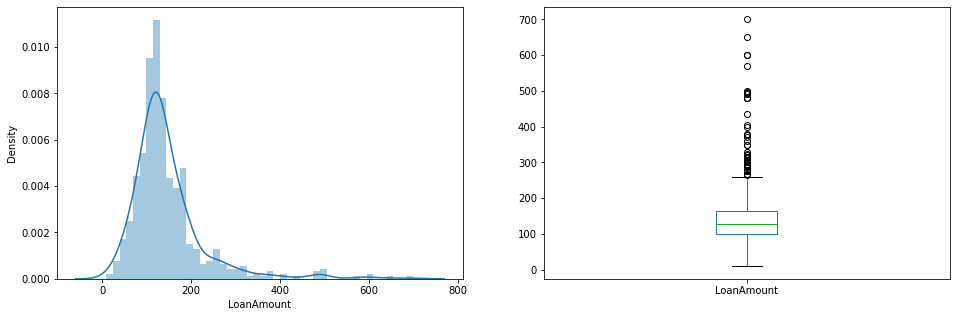

In [32]:
#Let’s look at the distribution of the LoanAmount variable.
plt.figure(1) 
plt.subplot(121)
df=train.dropna()
sns.distplot(train['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

Outliers have a major impact on the mean and standard deviation, which affects the distribution. Because it has no effect on smaller values, log transformation can be used to lower bigger values, resulting in a distribution comparable to the normal distribution.

Let’s visualize the effect of log transformation. We will do similar changes to the test data simultaneously.

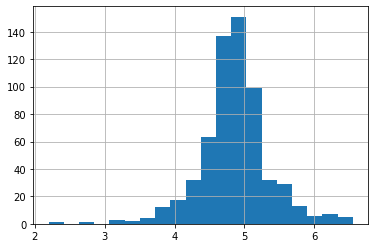

In [33]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

The distribution appears normal, with extreme values significantly reduced. A logistic regression model is now built to predict the test dataset.

---
<a id='section7'></a>
## <span style="color: #1f77b4;">Model Building: Part 1</span>

Let us make our first model predict the target variable. We will start with Logistic Regression which is used for predicting binary outcomes.

  - Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.
  
  - Logistic regression is an estimation of the Logit function. The logit function is simply a log of odds in favor of the event.

  - This function creates an S-shaped curve with the probability estimate, which is very similar to the required stepwise function

Let’s drop the Loan_ID variable as it does not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training dataset.

In [34]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

We will use “scikit-learn” (sklearn) for making different models.
Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the training dataset and save it in another dataset.

In [35]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

We will create dummy variables for categorical variables, converting them into a series of 0 and 1, simplifying their quantification and comparison.

  - Consider the “Gender” variable. It has two classes, Male and Female.
  - As logistic regression takes only the numerical values as input, we have to change male and female into a numerical value.
  - Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female), one for each class, i.e. Male and Female.
  - Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.

In [36]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

To train a model and validate predictions, divide the train dataset into two parts: train and validation. Train the model on the training part and make predictions for the validation part, ensuring true predictions are available for the test dataset.

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [ ]:
# The dataset has been divided into training and validation parts. 
# Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

model = LogisticRegression()

model.fit(x_train, y_train)

Let’s predict the Loan_Status for the validation set and calculate its accuracy.

In [ ]:
pred_cv = model.predict(x_cv)

Let us calculate how accurate our predictions are by calculating the accuracy.

In [ ]:
accuracy_score(y_cv,pred_cv)

So our predictions are almost 80% accurate, i.e. we have identified 80% of the loan status correctly.

Let’s make predictions for the test dataset.

In [ ]:
pred_test = model.predict(test)

<a id='section7.1'></a>
### <span style="color: #1f77b4;">Logistic Regression Using Stratified k-folds Cross-validation</span>

To check how robust our model is to unseen data, we can use Validation. It is a technique that involves reserving a particular sample of a dataset on which you do not train the model.

Let’s import StratifiedKFold from sklearn and fit the model.


In [ ]:
from sklearn.model_selection import StratifiedKFold

Now let’s make a cross-validation logistic model with stratified 5 folds and make predictions for the test dataset.

In [ ]:
from sklearn.model_selection import StratifiedKFold

# Initialize the fold counter
i = 1
total_accuracy = 0

# Create a StratifiedKFold object
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# Loop through the folds
for train_index, test_index in kf.split(X, y):
    print(f'Fold {i} of {kf.n_splits}')
    
    # Split the data into training and validation sets
    xtr, xvl = X.iloc[train_index], X.iloc[test_index]
    ytr, yvl = y.iloc[train_index], y.iloc[test_index]
    
    # Create and train a Logistic Regression model
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    
    # Make predictions on the validation set
    pred_test = model.predict(xvl)
    
    # Calculate and print the accuracy score
    score = accuracy_score(yvl, pred_test)
    print('Accuracy Score:', score)
    
    # Accumulate the accuracy for mean calculation
    total_accuracy += score
    
    i += 1

# Calculate the mean validation accuracy
mean_accuracy = total_accuracy / kf.n_splits
print('Mean Validation Accuracy:', mean_accuracy)

# Make predictions on the test set
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:, 1]  # This line should be outside the loop, using the last model


The mean validation accuracy for this model turns out to be 0.80. Let us visualize the roc curve.

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

We got an AUC value of 0.73.

---
<a id='section8'></a>
## <span style="color: #1f77b4;">Feature Engineering</span>
Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

  - Total Income:- As discussed during bivariate analysis we will combine the Applicant Income and Co-applicant Income. If the total income is high, the chances of loan approval might also be high.
  - EMI:- EMI is the monthly amount to be paid by the applicant to repay the loan. The idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.
  - Balance Income:- This is the income left after the EMI has been paid. The idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [ ]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

In [ ]:
# Let’s check the distribution of Total Income.
sns.distplot(train['Total_Income']);

We can see it is shifted towards the left, i.e., the distribution is right-skewed. So, let’s take the log transformation to make the distribution normal.

In [ ]:
train['Total_Income_log'] = np.log(train['Total_Income']) 
sns.distplot(train['Total_Income_log']); 
test['Total_Income_log'] = np.log(test['Total_Income'])

Now the distribution looks much closer to normal and the effect of extreme values has been significantly subsided. Let’s create the EMI feature now.

In [ ]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term'] 
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

In [ ]:
# Let’s check the distribution of the EMI variable.

sns.distplot(train['EMI']);

In [ ]:
# Let us create the Balance Income feature now and check its distribution.

train['Balance Income']=train['Total_Income']-(train['EMI']*1000) 
# Multiply with 1000 to make the units equal 
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income']);

Let us now drop the variables used to create new features due to high correlation between the old and new features, which logistic regression assumes are not highly correlated. This also helps reduce noise in the dataset by eliminating correlated features.

In [ ]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term'], axis=1)

---
<a id='section9'></a>
## <span style="color: #1f77b4;">Model Building: Part 2</span>
After creating new features, we can continue the model-building process.
We will build the following models.

  - Decision Tree
  - Random Forest
  - XGBoost

Let’s prepare the data for feeding into the models.

In [ ]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

<a id='section9.1'></a>
### <span style="color: #1f77b4;">Decision Tree</span>

Decision trees are supervised learning algorithms used in classification problems to split a population into homogeneous sub-populations based on the most significant splitter/differentiator in input variables. They use multiple algorithms to split a node into sub-nodes, increasing the homogeneity of the resultant sub-nodes and enhancing the node's purity with respect to the target variable.

In [ ]:
from sklearn import tree

# Initialize a fold counter
fold_counter = 1
total_accuracy = 0

# Create a StratifiedKFold object with 5 splits
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print(f'Fold {fold_counter} of {kf.get_n_splits()}')
    
    # Split the data into training and validation sets
    x_train, x_val = X.loc[train_index], X.loc[test_index]
    y_train, y_val = y[train_index], y[test_index]
    
    # Create and train the Decision Tree model
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(x_train, y_train)
    
    # Make predictions on the validation set
    pred_val = model.predict(x_val)
    
    # Calculate and print the accuracy score
    accuracy = accuracy_score(y_val, pred_val)
    print('Accuracy Score:', accuracy)
    
    # Accumulate the accuracy for mean calculation
    total_accuracy += accuracy
    
    # Increment the fold counter
    fold_counter += 1

# Calculate the mean validation accuracy
mean_accuracy = total_accuracy / kf.get_n_splits()
print('Mean Validation Accuracy:', mean_accuracy)

# Make predictions on the test set using the last trained model
pred_test = model.predict(test)


The mean validation accuracy for this model is 0.71.which is much lesser than the accuracy of the Decision tree model. So let’s build another model, i.e. Random Forest, a tree-based ensemble algorithm and try to improve our model by improving the accuracy.

<a id='section9.2'></a>
### <span style="color: #1f77b4;">Random Forest</span>

- RandomForest is a tree-based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction model.
- For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model.
- The final prediction can be a function of all the predictions made by the individual learners.

In the case of a regression problem, the final prediction can be the mean of all the predictions.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a fold counter
fold_counter = 1
total_accuracy = 0

# Create a StratifiedKFold object with 5 splits
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print(f'Fold {fold_counter} of {kf.get_n_splits()}')
    
    # Split the data into training and validation sets
    x_train, x_val = X.loc[train_index], X.loc[test_index]
    y_train, y_val = y[train_index], y[test_index]
    
    # Create and train the Random Forest model with a maximum depth of 10
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(x_train, y_train)
    
    # Make predictions on the validation set
    pred_val = model.predict(x_val)
    
    # Calculate and print the accuracy score
    accuracy = accuracy_score(y_val, pred_val)
    print('Accuracy Score:', accuracy)
    
    # Accumulate the accuracy for mean calculation
    total_accuracy += accuracy
    
    # Increment the fold counter
    fold_counter += 1

# Calculate the mean validation accuracy
mean_accuracy = total_accuracy / kf.get_n_splits()
print('Mean Validation Accuracy:', mean_accuracy)

# Make predictions on the test set using the last trained model
pred_test = model.predict(test)


The mean validation accuracy for this model is 0.79

Let us find the feature importance now, i.e. which features are most important for this problem. We will use the feature_importances_ attribute of sklearn to do so.

In [ ]:
importances=pd.Series(model.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))

We can see that Credit_History is the most important feature followed by Balance Income, Total Income, and EMI. So, feature engineering helped us in predicting our target variable.

<a id='section9.3'></a>
### <span style="color: #1f77b4;">XGBOOST</span>

XGBoost is a fast and efficient boosting algorithm that works only with numeric variables, replacing categorical variables with numeric ones. The parameters used in the model will be analyzed in the article, providing more information about boosting.

- n_estimator: This specifies the number of trees for the model.
- max_depth: We can specify the maximum depth of a tree using this parameter.

In [ ]:
from xgboost import XGBClassifier

# Initialize a fold counter
fold_counter = 1
total_accuracy = 0

# Create a StratifiedKFold object with 5 splits
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print(f'Fold {fold_counter} of {kf.get_n_splits()}')
    
    # Split the data into training and validation sets
    x_train, x_val = X.loc[train_index], X.loc[test_index]
    y_train, y_val = y[train_index], y[test_index]
    
    # Create and train the XGBoost model with 50 estimators and a maximum depth of 4
    model = XGBClassifier(n_estimators=50, max_depth=4)
    model.fit(x_train, y_train)
    
    # Make predictions on the validation set
    pred_val = model.predict(x_val)
    
    # Calculate and print the accuracy score
    accuracy = accuracy_score(y_val, pred_val)
    print('Accuracy Score:', accuracy)
    
    # Accumulate the accuracy for mean calculation
    total_accuracy += accuracy
    
    # Increment the fold counter
    fold_counter += 1

# Calculate the mean validation accuracy
mean_accuracy = total_accuracy / kf.get_n_splits()
print('Mean Validation Accuracy:', mean_accuracy)

# Make predictions on the test set
pred_test = model.predict(test)


The mean validation accuracy for this model is 0.77.

<a id='section10'></a>
## <span style="color: #1f77b4;">Conclusion</span>

In this machine learning project, we evaluated the performance of four different models on our dataset. The goal was to determine which model provides the highest classification accuracy. Here are the key findings:

1. **Logistic Regression**:
   - Mean Validation Accuracy: 0.8013
   - Performance: Highest accuracy among the models

2. **Decision Tree**:
   - Mean Validation Accuracy: 0.7149
   - Performance: Lower accuracy compared to other models

3. **Random Forest**:
   - Mean Validation Accuracy: 0.7947
   - Performance: Good accuracy

4. **XGBoost**:
   - Mean Validation Accuracy: Approximately 0.7752
   - Performance: Moderate accuracy



**Conclusion**:

The **Logistic Regression model** achieved the highest mean validation accuracy of approximately 0.8013, indicating that it is the top-performing model in terms of classifying our data. This model is recommended for use in this context, as it provides the highest accuracy.

The **Random Forest** model also performed well with a mean validation accuracy of 0.7947 and can be considered as an alternative, especially if you require a more complex model.

However, the **Decision Tree** model achieved a lower mean validation accuracy of 0.7149 and may not be the best choice for this specific problem.

It's important to note that the choice of the best model should align with the specific problem, dataset, and project requirements. Consider other factors, such as computational complexity and model interpretability, when making your final decision.

Ultimately, the success of the machine learning test depends on how well the chosen model's performance meets your project's objectives and requirements. Ensure that the model aligns with your specific success criteria and the goals of your project.
